# Edtech Analysis
## Introduction

## Overview of the dataset

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load in the cleaned data
I came across outliers, missing values and duplicate rows when analyzing the data. I have attached my notebook where I go through the process of cleaning and wrangling the data.

In [48]:
leads_df = pd.read_csv('clean/leads_basic_details_clean.csv')
interactions_df = pd.read_csv('clean/leads_interaction_details_clean.csv')
demos_df = pd.read_csv('clean/leads_demo_watched_details_clean.csv')
no_interest_df = pd.read_csv('clean/leads_reasons_for_no_interest_clean.csv')

## Analysis
### Why are leads dropping out

In [67]:
def plot_bar_chart(df,col,xlabel,y=False):
    order = df[col].value_counts().index
    base_color = sns.color_palette()[0]
    if y:
        sns.countplot(y=col,data=df,order=order,color=base_color)
        plt.ylabel(xlabel)
        plt.xlabel("Number of leads")
    else:
        sns.countplot(x=col,data=df,order=order,color=base_color)
        plt.xlabel(xlabel)
        plt.ylabel("Number of leads")
    plt.xticks(rotation=90);

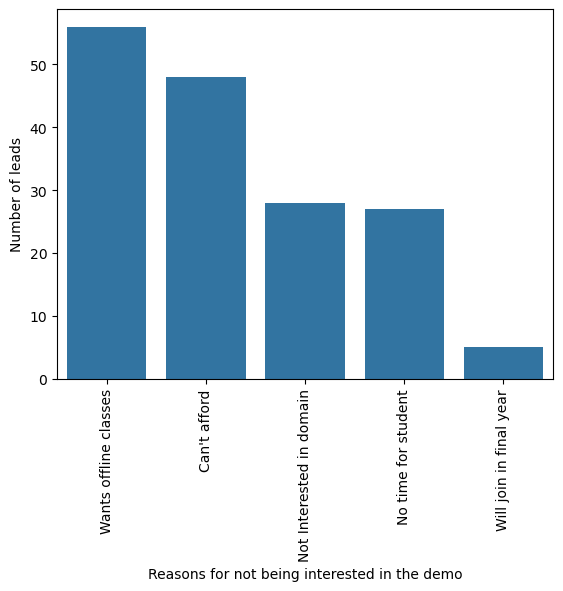

In [50]:
lead_end = no_interest_df.query("stage_dropped == 'lead'")
plot_bar_chart(lead_end,'reason','Reasons for not being interested in the demo');

Leads gave the reason of preferring offline classes and affordability as to why they weren't interested in demoing.

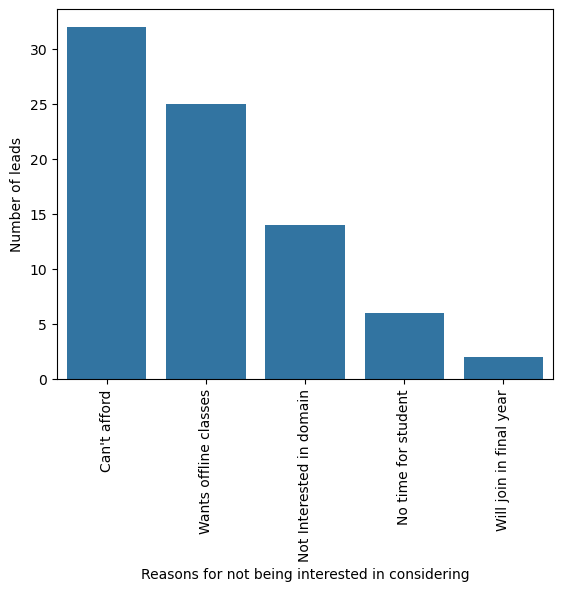

In [51]:
awareness_end = no_interest_df.query("stage_dropped == 'awareness'")
plot_bar_chart(awareness_end,'reason','Reasons for not being interested in considering');

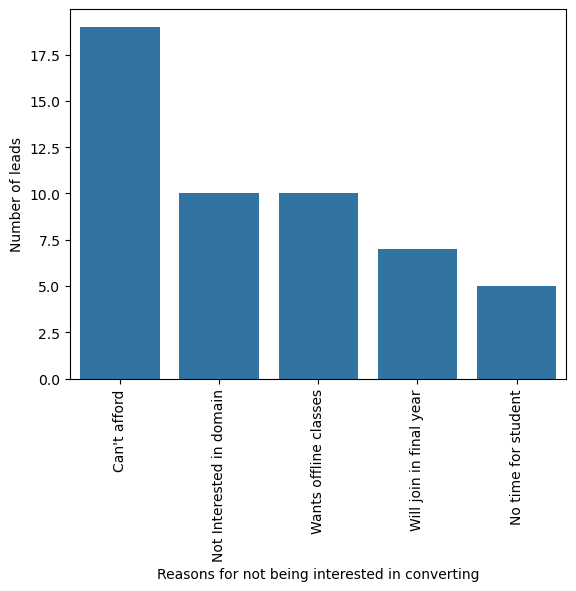

In [52]:
consider_end = no_interest_df.query("stage_dropped == 'consider'")
plot_bar_chart(consider_end,'reason','Reasons for not being interested in converting');

Mostly the leads cited affordability, preferring offline classes and not being in interested in the subject.

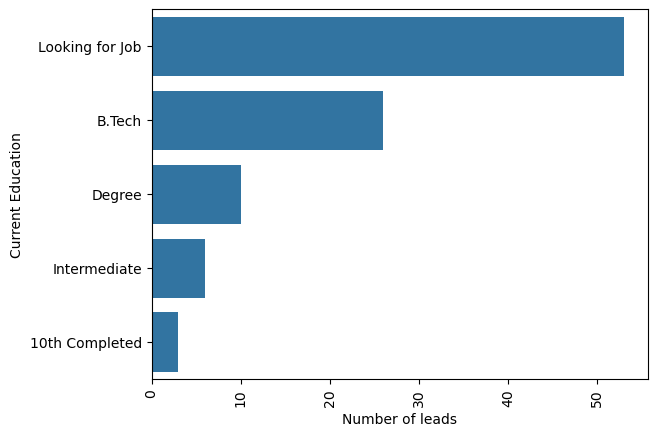

In [68]:
afford = no_interest_df[no_interest_df['reason']=="Can't afford"]
afford_details = pd.merge(afford,leads_df,on='lead_id')
plot_bar_chart(afford_details,'current_education','Current Education',y=True)

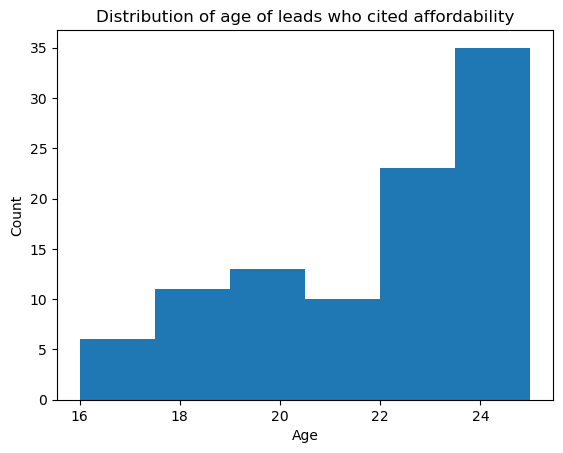

In [59]:
plt.hist(x='age',data=afford_details,bins=6)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of age of leads who cited affordability");

Majority of the leads who cited affordability are aged between 22-25 and are currently looking for a job. Maybe the parents can come in and support

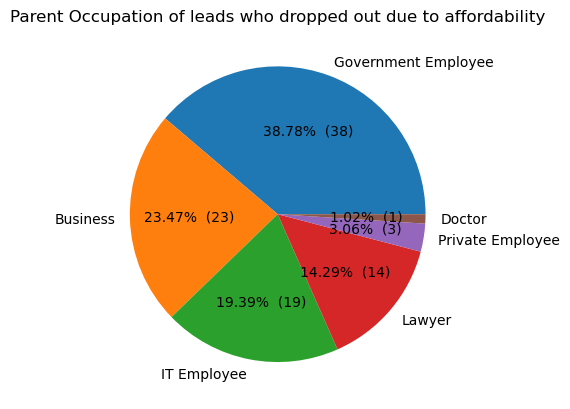

In [78]:
parent_count = afford_details['parent_occupation'].value_counts()
plt.pie(parent_count,labels=parent_count.index,autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(parent_count)/100))
plt.title("Parent Occupation of leads who dropped out due to affordability");

The parents are working as goverment employees or an IT employee or in business. 

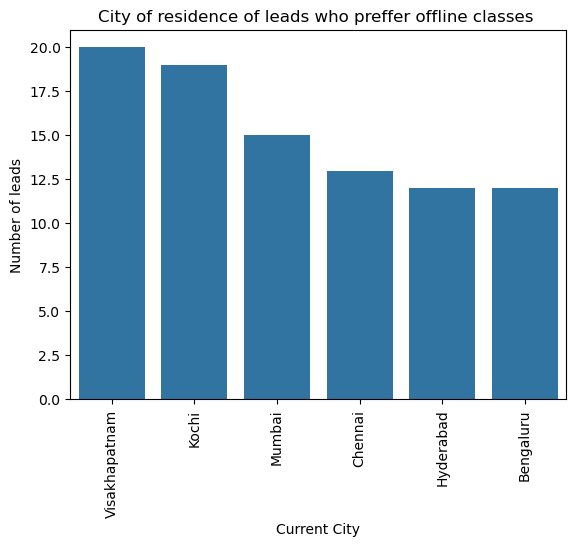

In [85]:
offline_class = no_interest_df[no_interest_df['reason']=='Wants offline classes']
offline_class_details = pd.merge(leads_df,offline_class,on='lead_id')
plot_bar_chart(offline_class_details,'current_city','Current City')
plt.title("City of residence of leads who preffer offline classes ");

Leads who preffered offline classes were mostly from Visakhapatnam, Kochi and Mumbai. The company could set up centres at these locations if they wanted to better accomodate the clients, or.....

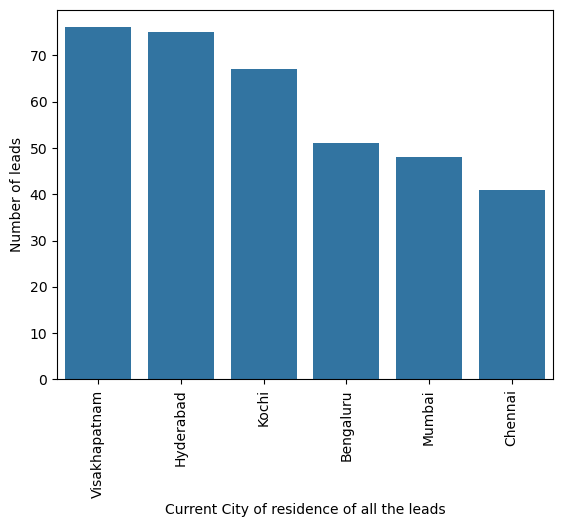

In [87]:
plot_bar_chart(leads_df,'current_city',"Current City of residence of all the leads")

or set up at Visakhapatnam, Hyderabad and Kochi if they are looking at the city of residence of all the leads.

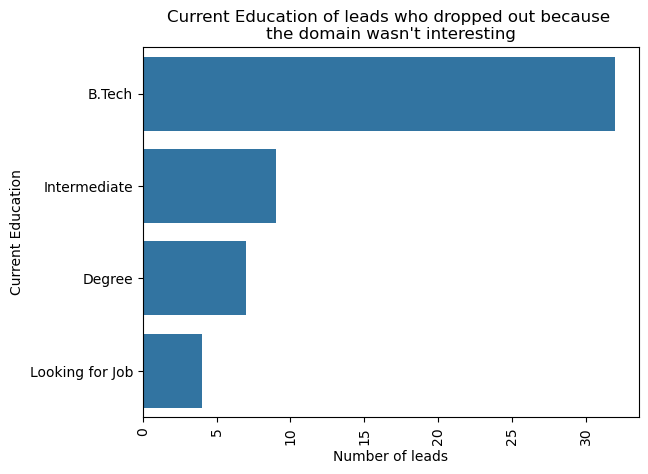

In [93]:
no_interest_domain = no_interest_df[no_interest_df['reason']=='Not Interested in domain']
no_interest_domain_details = pd.merge(leads_df,no_interest_domain,on='lead_id')
plot_bar_chart(no_interest_domain_details,'current_education',"Current Education",y=True)
plt.title("Current Education of leads who dropped out because \nthe domain wasn't interesting");

Overwhelming number of the leads are Bachelor of Technology students. The company could perform a survey on B.Tech students to see what subjects are interesting for them and use that to tailor make new courses.